# Determining The Best Performing Type Of Films At The Box Office

## Project Overview
* A detailed finding of which types of films make the most revenue at the box office.
* Clean and explore the different types of datasets and find out which datasets are best suited for this project.
* Merge the different datasets I have decided to use.
* Communicate insights using visualizations, clearly depicting which types of films the head of the movie studio should create in the new movie studio.
  

## Business Understanding

Project goals:
1. Explore the different datasets showing the reviews, budgets and gross.
2. Find the  type of films that perform well in the Box Office.
3. Provide the head of the movie studio with information on which type of movies to create.

Once  these goals  have been met  I will be able to identify the type of films that will generate  a large revenue for  the head of the new movie studio as they partake in this new venture.


## Data Understanding

I am now  going to explore the different datasets which include(Bom movie gross csv, im.db, rt.movie.info, rt.reviews.tsv, tmdb.movies.csv, tn.movie_budgets.csv) to find the suitable datasets that would work with this project.

In [8]:
# loading the sqlite dataset
import pandas as pd
import sqlite3
import warnings
warnings.filterwarnings('ignore')
conn=sqlite3.connect('im.db')

In [9]:
#getting the different types of tables
df= pd.read_sql("""
   SELECT *
   FROM sqlite_master
   """
,conn)
df[df['type']=='table']

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Above are the tables for the  imdb dataset. I will mostly work with the movie basics and movie ratings.

In [11]:
## showing the columns in movie basics and movie ratings tables
q ="""
   SELECT *
   FROM movie_basics;
"""
pd.read_sql(q,conn)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [12]:
q ="""
   SELECT *
   FROM movie_ratings;
"""
pd.read_sql(q,conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [13]:
q="""
  SELECT *
  FROM movie_akas
;"""
pd.read_sql(q,conn).head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


I have reviewed the rest of the tables and they're not as important

In [15]:
# i can join the movie_basics and the movie_ratings table
df1 =pd.read_sql("""
   SELECT *
   FROM movie_basics
   JOIN movie_ratings
   USING (movie_id)
"""
,conn)
df1.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [16]:
# box office mojo dataset
df2=pd.read_csv('bom.movie_gross.csv')
df2

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [17]:
# rotten tomatoes dataset
df3=pd.read_csv('rt.movie_info.tsv',delimiter='\t')
df3

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [18]:
df4=pd.read_csv('rt.reviews.tsv',delimiter='\t',encoding='latin-1')
df4.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [19]:
#themovieDB dataset
df5=pd.read_csv('tmdb.movies.csv')
df5.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [20]:
# the numbers dataset
df6=pd.read_csv('tn.movie_budgets.csv')
df6

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Above I've displayed the six datasets.

I will review four datasets to decide which datasets are suitable to merge.

The first dataset is the box office mojo dataset(df2) since it contains domestic and foreign gross so it helps us know how much money was made locally and internationally

The second dataset is the Rotten tomatoes(df3) dataset which contains the genre and the Box office revenue for the films

The third dataset is the themovieDB dataset(df5) since it contains the movie rating and title 

The fourth dataset is the the numbers dataset(df6) since it contains the production budget and the gross of the films so we can see how much profit the movies are making hence identifying the type of films that won't incur loss and  are popular films among the audiences.

## Data Preparation

Cleaning and accessing the four datasets

In [29]:
# The Box office mojo dataset
df2

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [30]:
df2.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [31]:
df2=df2.dropna(subset=['domestic_gross','studio'])
df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [32]:
#converting values in foreign gross to numeric
df2['foreign_gross'] = df2['foreign_gross'].str.replace(',', '')
df2['foreign_gross'] = pd.to_numeric(df2['foreign_gross'])
df2['foreign_gross'].median()

19400000.0

In [33]:
#filling the missing values in foreign gross with median
df2['foreign_gross']=df2["foreign_gross"].fillna(df2["foreign_gross"].median())
df2


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,19400000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,19400000.0,2018
3384,El Pacto,Sony,2500.0,19400000.0,2018
3385,The Swan,Synergetic,2400.0,19400000.0,2018


In [34]:
df2.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [35]:
## Cleaning the rotten tomatoes dataset
df3.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [36]:
df3.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

I will drop columns that have  a large number of missing values and columns I don't need.

In [38]:
##dropping columns
df3=df3.drop(['director','currency','writer','studio','synopsis','dvd_date','box_office'],axis=1)
df3
             

,id,rating,genre,theater_date,runtime
0,1,R,Action and Adventure|Classics|Drama,"Oct 9, 1971",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",108 minutes
2,5,R,Drama|Musical and Performing Arts,"Sep 13, 1996",116 minutes
3,6,R,Drama|Mystery and Suspense,"Dec 9, 1994",128 minutes
4,7,NR,Drama|Romance,NaN,200 minutes
...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,"Aug 18, 2006",106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,"Jul 23, 1993",88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,"Jan 1, 1962",111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,"Apr 1, 1993",101 minutes


The column box office that I wanted to use for my analysis  has a lot of missing values and replacing these missing values will make the data biased,so I was only left with the option of dropping the column.

Now I am  going to drop rows containing a low number of missing values

In [41]:
df3=df3.dropna(subset=['rating','genre','runtime','theater_date'])
df3


,id,rating,genre,theater_date,runtime
0,1,R,Action and Adventure|Classics|Drama,"Oct 9, 1971",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",108 minutes
2,5,R,Drama|Musical and Performing Arts,"Sep 13, 1996",116 minutes
3,6,R,Drama|Mystery and Suspense,"Dec 9, 1994",128 minutes
5,8,PG,Drama|Kids and Family,"Mar 3, 2000",95 minutes
...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,"Aug 18, 2006",106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,"Jul 23, 1993",88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,"Jan 1, 1962",111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,"Apr 1, 1993",101 minutes


In [42]:
# Checking whether they're any remaining missing values
df3.isnull().sum()

id              0
rating          0
genre           0
theater_date    0
runtime         0
dtype: int64

In [43]:
# Cleaning themovieDB dataset
df5.head(7)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676


In [44]:
df5.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

ThemovieDB dataset contains no missing values but I can drop columns I don't want

In [46]:
df5=df5.drop(['original_language','Unnamed: 0','original_title','genre_ids'],axis=1)
df5.head()

,id,popularity,release_date,title,vote_average,vote_count
0,12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,10138,28.515,2010-05-07,Iron Man 2,6.8,12368
3,862,28.005,1995-11-22,Toy Story,7.9,10174
4,27205,27.920,2010-07-16,Inception,8.3,22186


In [47]:
#splitting
df5['release_date'].str.split('-',n=3,expand=True)

,0,1,2
0,2010,11,19
1,2010,03,26
2,2010,05,07
3,1995,11,22
4,2010,07,16
...,...,...,...
26512,2018,10,13
26513,2018,05,01
26514,2018,10,01
26515,2018,06,22


In [48]:
# renaming the 0 ,1 and 2 columns
df5['release_date'].str.split('-',n=3,expand=True).rename(columns={0:'year',1:'month',2:'date'})

,year,month,date
0,2010,11,19
1,2010,03,26
2,2010,05,07
3,1995,11,22
4,2010,07,16
...,...,...,...
26512,2018,10,13
26513,2018,05,01
26514,2018,10,01
26515,2018,06,22


In [49]:
##returning this to the dataset
df5[['year','month','date']]=df5['release_date'].str.split('-',n=3,expand=True)
df5.head(10)

,id,popularity,release_date,title,vote_average,vote_count,year,month,date
0,12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11,19
1,10191,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,03,26
2,10138,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,05,07
3,862,28.005,1995-11-22,Toy Story,7.9,10174,1995,11,22
4,27205,27.920,2010-07-16,Inception,8.3,22186,2010,07,16
5,32657,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010,02,11
6,19995,26.526,2009-12-18,Avatar,7.4,18676,2009,12,18
7,10193,24.445,2010-06-17,Toy Story 3,7.7,8340,2010,06,17
8,20352,23.673,2010-07-09,Despicable Me,7.2,10057,2010,07,09
9,38055,22.855,2010-11-04,Megamind,6.8,3635,2010,11,04


In [50]:
# I can drop the release_date column and the month_date column since I don't need them
df5=df5.drop(['release_date','month','date'],axis=1)
df5

,id,popularity,title,vote_average,vote_count,year
0,12444,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,10191,28.734,How to Train Your Dragon,7.7,7610,2010
2,10138,28.515,Iron Man 2,6.8,12368,2010
3,862,28.005,Toy Story,7.9,10174,1995
4,27205,27.920,Inception,8.3,22186,2010
...,...,...,...,...,...,...
26512,488143,0.600,Laboratory Conditions,0.0,1,2018
26513,485975,0.600,_EXHIBIT_84xxx_,0.0,1,2018
26514,381231,0.600,The Last One,0.0,1,2018
26515,366854,0.600,Trailer Made,0.0,1,2018


In [51]:
# the numbers dataset
df6

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [52]:
df6.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The numbers dataset contains no missing values

Since df2(Box office mojo dataset) and df6(the numbers dataset) have a column movie and title which have the same type of values ,  i can rename the column movie in df6 to match title in df2

In [55]:
df6.rename(columns={'movie':'title'},inplace=True)
df6

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


I can also split the release date  to get the year column the same as the year column in df2

In [57]:
#splitting
df6['release_date'].str.split(',',n=2,expand=True)

,0,1
0,Dec 18,2009
1,May 20,2011
2,Jun 7,2019
3,May 1,2015
4,Dec 15,2017
...,...,...
5777,Dec 31,2018
5778,Apr 2,1999
5779,Jul 13,2005
5780,Sep 29,2015


In [58]:
# renaming the 0 and 1 column
df6['release_date'].str.split(',',n=2,expand=True).rename(columns={0:'month_date',1:'year'})

,month_date,year
0,Dec 18,2009
1,May 20,2011
2,Jun 7,2019
3,May 1,2015
4,Dec 15,2017
...,...,...
5777,Dec 31,2018
5778,Apr 2,1999
5779,Jul 13,2005
5780,Sep 29,2015


Now I have column year and month_date

In [60]:
##returning this to the dataset
df6[['month_date','year']]=df6['release_date'].str.split(',',n=2,expand=True)
df6.head(10)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec 18,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May 20,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun 7,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May 1,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec 15,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",Dec 18,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Apr 27,2018
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",May 24,2007
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",Nov 17,2017
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",Nov 6,2015


In [61]:
#I can drop the release_date column and the month_date column since I don't need them
df6=df6.drop(['release_date','month_date'],axis=1)
df6

,id,title,production_budget,domestic_gross,worldwide_gross,year
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0,2018
5778,79,Following,"$6,000","$48,482","$240,495",1999
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,A Plague So Pleasant,"$1,400",$0,$0,2015


## Merging the Datasets

I am going to merge df2 and df6 first since they've similar column names which are column (title, year and domestic gross)

In [64]:
# merging df2 and df6 which are different databases
#merge with the same column names
#concat=with different data types and because i can't merge with numerical values
# using ignore_index argument so I can create a new index
#using sort  argument  to keep the original order

df7=pd.concat([df6,df2],ignore_index=True,sort=False)
df7




,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1.0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,NaN,NaN
1,2.0,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,NaN,NaN
2,3.0,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,NaN,NaN
3,4.0,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,NaN,NaN
4,5.0,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,NaN,NaN
...,...,...,...,...,...,...,...,...
9133,NaN,The Quake,NaN,6200.0,NaN,2018,Magn.,19400000.0
9134,NaN,Edward II (2018 re-release),NaN,4800.0,NaN,2018,FM,19400000.0
9135,NaN,El Pacto,NaN,2500.0,NaN,2018,Sony,19400000.0
9136,NaN,The Swan,NaN,2400.0,NaN,2018,Synergetic,19400000.0


The merged data contains missing values

There is correlation between these two datasets so I can fill in some of the missing values by adding and subtracting from the columns,these columns include:domestic_gross, foreign_gross and worldwide_gross

First I have to  create uniformity between the column values by removing the dollar sign.

In [68]:
# regex helps python  understand special characters like dollar sign
df7['domestic_gross']=df7['domestic_gross'].replace('[$,]','',regex=True ).astype(float)
df7.head()

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1.0,Avatar,"$425,000,000",760507625.0,"$2,776,345,279",2009,NaN,NaN
1,2.0,Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875.0,"$1,045,663,875",2011,NaN,NaN
2,3.0,Dark Phoenix,"$350,000,000",42762350.0,"$149,762,350",2019,NaN,NaN
3,4.0,Avengers: Age of Ultron,"$330,600,000",459005868.0,"$1,403,013,963",2015,NaN,NaN
4,5.0,Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382.0,"$1,316,721,747",2017,NaN,NaN


In [69]:
df7['foreign_gross']=df7['foreign_gross'].replace('[$,]','',regex=True ).astype(float)
df7.head()

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1.0,Avatar,"$425,000,000",760507625.0,"$2,776,345,279",2009,NaN,NaN
1,2.0,Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875.0,"$1,045,663,875",2011,NaN,NaN
2,3.0,Dark Phoenix,"$350,000,000",42762350.0,"$149,762,350",2019,NaN,NaN
3,4.0,Avengers: Age of Ultron,"$330,600,000",459005868.0,"$1,403,013,963",2015,NaN,NaN
4,5.0,Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382.0,"$1,316,721,747",2017,NaN,NaN


In [70]:
df7['worldwide_gross']=df7['worldwide_gross'].replace('[$,]','',regex=True ).astype(float)
df7

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1.0,Avatar,"$425,000,000",760507625.0,2.776345e+09,2009,NaN,NaN
1,2.0,Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875.0,1.045664e+09,2011,NaN,NaN
2,3.0,Dark Phoenix,"$350,000,000",42762350.0,1.497624e+08,2019,NaN,NaN
3,4.0,Avengers: Age of Ultron,"$330,600,000",459005868.0,1.403014e+09,2015,NaN,NaN
4,5.0,Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382.0,1.316722e+09,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
9133,NaN,The Quake,NaN,6200.0,NaN,2018,Magn.,19400000.0
9134,NaN,Edward II (2018 re-release),NaN,4800.0,NaN,2018,FM,19400000.0
9135,NaN,El Pacto,NaN,2500.0,NaN,2018,Sony,19400000.0
9136,NaN,The Swan,NaN,2400.0,NaN,2018,Synergetic,19400000.0


In [71]:
df7['production_budget']=df7['production_budget'].replace('[$,]','',regex=True ).astype(float)
df7

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1.0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,NaN
1,2.0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,NaN,NaN
2,3.0,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,NaN,NaN
3,4.0,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,NaN,NaN
4,5.0,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
9133,NaN,The Quake,NaN,6200.0,NaN,2018,Magn.,19400000.0
9134,NaN,Edward II (2018 re-release),NaN,4800.0,NaN,2018,FM,19400000.0
9135,NaN,El Pacto,NaN,2500.0,NaN,2018,Sony,19400000.0
9136,NaN,The Swan,NaN,2400.0,NaN,2018,Synergetic,19400000.0


In [72]:
# further confirmining if the dollar sign has been removed
df7.loc[df7['title']=='Avatar']


,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1.0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,NaN


## Filling in the Missing values
* Using adding and subtracting column names

In [74]:
df7['worldwide_gross']=df7['worldwide_gross'].fillna(df7['domestic_gross']+ df7['foreign_gross'])
df7

,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1.0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,NaN
1,2.0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,NaN,NaN
2,3.0,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,NaN,NaN
3,4.0,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,NaN,NaN
4,5.0,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
9133,NaN,The Quake,NaN,6200.0,1.940620e+07,2018,Magn.,19400000.0
9134,NaN,Edward II (2018 re-release),NaN,4800.0,1.940480e+07,2018,FM,19400000.0
9135,NaN,El Pacto,NaN,2500.0,1.940250e+07,2018,Sony,19400000.0
9136,NaN,The Swan,NaN,2400.0,1.940240e+07,2018,Synergetic,19400000.0


In [75]:
## filling in missing values in foreign gross
df7['foreign_gross']=df7['foreign_gross'].fillna( df7['worldwide_gross']-df7['domestic_gross'])
df7


,id,title,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross
0,1.0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,2.015838e+09
1,2.0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,NaN,8.046000e+08
2,3.0,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,NaN,1.070000e+08
3,4.0,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,NaN,9.440081e+08
4,5.0,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,NaN,6.965404e+08
...,...,...,...,...,...,...,...,...
9133,NaN,The Quake,NaN,6200.0,1.940620e+07,2018,Magn.,1.940000e+07
9134,NaN,Edward II (2018 re-release),NaN,4800.0,1.940480e+07,2018,FM,1.940000e+07
9135,NaN,El Pacto,NaN,2500.0,1.940250e+07,2018,Sony,1.940000e+07
9136,NaN,The Swan,NaN,2400.0,1.940240e+07,2018,Synergetic,1.940000e+07


In [76]:
df7.isnull().sum()

id                   3356
title                   0
production_budget    3356
domestic_gross          0
worldwide_gross         0
year                    0
studio               5782
foreign_gross           0
dtype: int64

I can drop the studio which has a high number of missing values  and id column  since i've no use for it.

In [78]:
df7=df7.drop(['studio','id'],axis=1)
df7

,title,production_budget,domestic_gross,worldwide_gross,year,foreign_gross
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.015838e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,8.046000e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,1.070000e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,9.440081e+08
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,6.965404e+08
...,...,...,...,...,...,...
9133,The Quake,NaN,6200.0,1.940620e+07,2018,1.940000e+07
9134,Edward II (2018 re-release),NaN,4800.0,1.940480e+07,2018,1.940000e+07
9135,El Pacto,NaN,2500.0,1.940250e+07,2018,1.940000e+07
9136,The Swan,NaN,2400.0,1.940240e+07,2018,1.940000e+07


In [79]:
df7['production_budget'].value_counts()

production_budget
20000000.0    231
10000000.0    212
30000000.0    177
15000000.0    173
25000000.0    171
             ... 
13900000.0      1
14200000.0      1
14400000.0      1
14600000.0      1
1100.0          1
Name: count, Length: 509, dtype: int64

In [80]:
df7['production_budget'].median()

17000000.0

In [81]:
##replacing the null values in production budget with the median
df7['production_budget']=df7['production_budget'].fillna(df7['production_budget'].median())
df7


,title,production_budget,domestic_gross,worldwide_gross,year,foreign_gross
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.015838e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,8.046000e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,1.070000e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,9.440081e+08
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,6.965404e+08
...,...,...,...,...,...,...
9133,The Quake,17000000.0,6200.0,1.940620e+07,2018,1.940000e+07
9134,Edward II (2018 re-release),17000000.0,4800.0,1.940480e+07,2018,1.940000e+07
9135,El Pacto,17000000.0,2500.0,1.940250e+07,2018,1.940000e+07
9136,The Swan,17000000.0,2400.0,1.940240e+07,2018,1.940000e+07


In [82]:
df7.isnull().sum()

title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
year                 0
foreign_gross        0
dtype: int64

My df7 dataset contains no missing values

In [84]:
# merging df7 and df5
# using ignore_index argument so I can create a new index
#using sort  argument  to keep the original order
df8=pd.concat([df5,df7],ignore_index=True,sort=False)
df8

,id,popularity,title,vote_average,vote_count,year,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,12444.0,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0,2010,NaN,NaN,NaN,NaN
1,10191.0,28.734,How to Train Your Dragon,7.7,7610.0,2010,NaN,NaN,NaN,NaN
2,10138.0,28.515,Iron Man 2,6.8,12368.0,2010,NaN,NaN,NaN,NaN
3,862.0,28.005,Toy Story,7.9,10174.0,1995,NaN,NaN,NaN,NaN
4,27205.0,27.920,Inception,8.3,22186.0,2010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
35650,NaN,NaN,The Quake,NaN,NaN,2018,17000000.0,6200.0,19406200.0,19400000.0
35651,NaN,NaN,Edward II (2018 re-release),NaN,NaN,2018,17000000.0,4800.0,19404800.0,19400000.0
35652,NaN,NaN,El Pacto,NaN,NaN,2018,17000000.0,2500.0,19402500.0,19400000.0
35653,NaN,NaN,The Swan,NaN,NaN,2018,17000000.0,2400.0,19402400.0,19400000.0


In [85]:
df8.isnull().sum()

id                    9138
popularity            9138
title                    0
vote_average          9138
vote_count            9138
year                     0
production_budget    26517
domestic_gross       26517
worldwide_gross      26517
foreign_gross        26517
dtype: int64

Merging with a third dataset creates a lot of missing values in the columns i want to use for my analysis, that is (domestic_gross, foreign_gross, production_budget, worldwide_gross)

In [87]:
## trying to add dataset df3
df3

,id,rating,genre,theater_date,runtime
0,1,R,Action and Adventure|Classics|Drama,"Oct 9, 1971",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",108 minutes
2,5,R,Drama|Musical and Performing Arts,"Sep 13, 1996",116 minutes
3,6,R,Drama|Mystery and Suspense,"Dec 9, 1994",128 minutes
5,8,PG,Drama|Kids and Family,"Mar 3, 2000",95 minutes
...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,"Aug 18, 2006",106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,"Jul 23, 1993",88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,"Jan 1, 1962",111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,"Apr 1, 1993",101 minutes


In [88]:
#spliiting and renaming
df3['theater_date'].str.split(',',n=2,expand=True).rename(columns={0:'month_date',1:'year'})

,month_date,year
0,Oct 9,1971
1,Aug 17,2012
2,Sep 13,1996
3,Dec 9,1994
5,Mar 3,2000
...,...,...
1555,Aug 18,2006
1556,Jul 23,1993
1557,Jan 1,1962
1558,Apr 1,1993


In [89]:
#returning to the dataset
df3[['month_date','year']]=df3['theater_date'].str.split(',',n=2,expand=True)
df3.head()

,id,rating,genre,theater_date,runtime,month_date,year
0,1,R,Action and Adventure|Classics|Drama,"Oct 9, 1971",104 minutes,Oct 9,1971
1,3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",108 minutes,Aug 17,2012
2,5,R,Drama|Musical and Performing Arts,"Sep 13, 1996",116 minutes,Sep 13,1996
3,6,R,Drama|Mystery and Suspense,"Dec 9, 1994",128 minutes,Dec 9,1994
5,8,PG,Drama|Kids and Family,"Mar 3, 2000",95 minutes,Mar 3,2000


In [90]:
df3=df3.drop(['theater_date','month_date'],axis=1)
df3.head()

,id,rating,genre,runtime,year
0,1,R,Action and Adventure|Classics|Drama,104 minutes,1971
1,3,R,Drama|Science Fiction and Fantasy,108 minutes,2012
2,5,R,Drama|Musical and Performing Arts,116 minutes,1996
3,6,R,Drama|Mystery and Suspense,128 minutes,1994
5,8,PG,Drama|Kids and Family,95 minutes,2000


In [91]:
 #Trying to merge with df7 and df3
df9=pd.concat([df7,df3],ignore_index=False,sort=False)
df9.head()

,title,production_budget,domestic_gross,worldwide_gross,year,foreign_gross,id,rating,genre,runtime
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.015838e+09,NaN,NaN,NaN,NaN
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,8.046000e+08,NaN,NaN,NaN,NaN
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,1.070000e+08,NaN,NaN,NaN,NaN
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,9.440081e+08,NaN,NaN,NaN,NaN
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,6.965404e+08,NaN,NaN,NaN,NaN


In [92]:
df9.isnull().sum()

title                1194
production_budget    1194
domestic_gross       1194
worldwide_gross      1194
year                    0
foreign_gross        1194
id                   9138
rating               9138
genre                9138
runtime              9138
dtype: int64

Joining the third dataset(rotten tomatoes) with the first two merged datasets still brings a lot of missing values.

I have come to a conclusion that its best to just use the two datasets which have more correlation.

So our merged dataset is df7 which i am going to give it a variable merged df

## Final Dataset

In [97]:
Merged_df=df7
Merged_df

,title,production_budget,domestic_gross,worldwide_gross,year,foreign_gross
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.015838e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,8.046000e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,1.070000e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,9.440081e+08
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,6.965404e+08
...,...,...,...,...,...,...
9133,The Quake,17000000.0,6200.0,1.940620e+07,2018,1.940000e+07
9134,Edward II (2018 re-release),17000000.0,4800.0,1.940480e+07,2018,1.940000e+07
9135,El Pacto,17000000.0,2500.0,1.940250e+07,2018,1.940000e+07
9136,The Swan,17000000.0,2400.0,1.940240e+07,2018,1.940000e+07


In [98]:
##getting information.
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9138 entries, 0 to 9137
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9138 non-null   object 
 1   production_budget  9138 non-null   float64
 2   domestic_gross     9138 non-null   float64
 3   worldwide_gross    9138 non-null   float64
 4   year               9138 non-null   object 
 5   foreign_gross      9138 non-null   float64
dtypes: float64(4), object(2)
memory usage: 428.5+ KB


My dataset contains 9138 rows and 6 columns

In [100]:
Merged_df.isnull().sum()

title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
year                 0
foreign_gross        0
dtype: int64

In [101]:
Merged_df.describe()

,production_budget,domestic_gross,worldwide_gross,foreign_gross
count,9.138000e+03,9.138000e+03,9.138000e+03,9.138000e+03
mean,2.623029e+07,3.706158e+07,8.796449e+07,5.090291e+07
std,3.399379e+07,6.808009e+07,1.723733e+08,1.121231e+08
min,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+07,3.271790e+05,8.000000e+06,4.410160e+05
50%,1.700000e+07,1.010000e+07,2.178150e+07,1.875619e+07
75%,2.500000e+07,4.479831e+07,8.562540e+07,4.167588e+07
max,4.250000e+08,9.367000e+08,2.776345e+09,2.015838e+09


In [102]:
## checking for duplicates
Merged_df.duplicated(subset=['title']).any()

True

In [103]:
Merged_df=Merged_df.drop_duplicates(subset=['title'],keep='first')
Merged_df

,title,production_budget,domestic_gross,worldwide_gross,year,foreign_gross
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.015838e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,8.046000e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,1.070000e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,9.440081e+08
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,6.965404e+08
...,...,...,...,...,...,...
9133,The Quake,17000000.0,6200.0,1.940620e+07,2018,1.940000e+07
9134,Edward II (2018 re-release),17000000.0,4800.0,1.940480e+07,2018,1.940000e+07
9135,El Pacto,17000000.0,2500.0,1.940250e+07,2018,1.940000e+07
9136,The Swan,17000000.0,2400.0,1.940240e+07,2018,1.940000e+07


In [104]:
## checking for duplicates
Merged_df.duplicated(subset=['title','production_budget','domestic_gross','worldwide_gross','year','foreign_gross']).any()

False

So thery're no duplicates in our merged dataset

I am now going to make a profit and loss column

In [107]:
Merged_df['profit_loss']=Merged_df['worldwide_gross']- Merged_df['production_budget']
Merged_df

,title,production_budget,domestic_gross,worldwide_gross,year,foreign_gross,profit_loss
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.015838e+09,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,8.046000e+08,6.350639e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,1.070000e+08,-2.002376e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,9.440081e+08,1.072414e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,6.965404e+08,9.997217e+08
...,...,...,...,...,...,...,...
9133,The Quake,17000000.0,6200.0,1.940620e+07,2018,1.940000e+07,2.406200e+06
9134,Edward II (2018 re-release),17000000.0,4800.0,1.940480e+07,2018,1.940000e+07,2.404800e+06
9135,El Pacto,17000000.0,2500.0,1.940250e+07,2018,1.940000e+07,2.402500e+06
9136,The Swan,17000000.0,2400.0,1.940240e+07,2018,1.940000e+07,2.402400e+06


Values with a negative sign  indicate the movie made losses and values that are positive indicate the studio got a return for their investment.

In [109]:
Merged_df['year'].unique()

array([' 2009', ' 2011', ' 2019', ' 2015', ' 2017', ' 2018', ' 2007',
       ' 2012', ' 2013', ' 2010', ' 2016', ' 2014', ' 2006', ' 2008',
       ' 2005', ' 1997', ' 2004', ' 1999', ' 1995', ' 2003', ' 2001',
       ' 2020', ' 2002', ' 1998', ' 2000', ' 1991', ' 1994', ' 1996',
       ' 1993', ' 1992', ' 1988', ' 1990', ' 1989', ' 1978', ' 1981',
       ' 1984', ' 1982', ' 1985', ' 1980', ' 1963', ' 1987', ' 1986',
       ' 1983', ' 1979', ' 1977', ' 1970', ' 1969', ' 1965', ' 1962',
       ' 1964', ' 1966', ' 1974', ' 1956', ' 1975', ' 1973', ' 1960',
       ' 1968', ' 1967', ' 1971', ' 1951', ' 1972', ' 1976', ' 1961',
       ' 1946', ' 1944', ' 1953', ' 1954', ' 1957', ' 1959', ' 1952',
       ' 1930', ' 1939', ' 1925', ' 1950', ' 1948', ' 1958', ' 1943',
       ' 1940', ' 1945', ' 1947', ' 1938', ' 1927', ' 1949', ' 1955',
       ' 1936', ' 1937', ' 1941', ' 1942', ' 1935', ' 1931', ' 1933',
       ' 1916', ' 1929', ' 1934', ' 1920', 2010, 2011, 2012, 2013, 2014,
       2015, 2016

In [110]:
#making column year uniform since not all values are numeric
Merged_df['year'] = pd.to_numeric(Merged_df['year'])

## Data Analysis

I am going to make use of Exploratory Data Analysis

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt


First I am going to check the years with the most movie releases


In [115]:
Merged_df['year'].value_counts()

year
2015    637
2014    517
2016    511
2011    484
2012    482
       ... 
1937      1
1930      1
1950      1
1927      1
1920      1
Name: count, Length: 95, dtype: int64

In [116]:
Merged_df['year'].unique()

array([2009, 2011, 2019, 2015, 2017, 2018, 2007, 2012, 2013, 2010, 2016,
       2014, 2006, 2008, 2005, 1997, 2004, 1999, 1995, 2003, 2001, 2020,
       2002, 1998, 2000, 1991, 1994, 1996, 1993, 1992, 1988, 1990, 1989,
       1978, 1981, 1984, 1982, 1985, 1980, 1963, 1987, 1986, 1983, 1979,
       1977, 1970, 1969, 1965, 1962, 1964, 1966, 1974, 1956, 1975, 1973,
       1960, 1968, 1967, 1971, 1951, 1972, 1976, 1961, 1946, 1944, 1953,
       1954, 1957, 1959, 1952, 1930, 1939, 1925, 1950, 1948, 1958, 1943,
       1940, 1945, 1947, 1938, 1927, 1949, 1955, 1936, 1937, 1941, 1942,
       1935, 1931, 1933, 1916, 1929, 1934, 1920], dtype=int64)

I can confirm now that all the values in column year are numeric

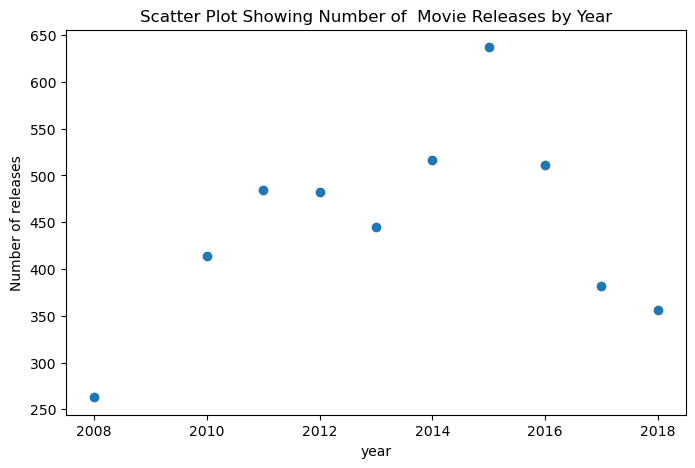

In [118]:
fig,ax=plt.subplots(figsize=(8,5))
x=list(Merged_df['year'].value_counts().index[:10])
y=list(Merged_df['year'].value_counts().values[:10])
ax.scatter(x,y)
ax.set_title('Scatter Plot Showing Number of  Movie Releases by Year')
ax.set_xlabel('year')
ax.set_ylabel('Number of releases');

           


## Observation
* The year with the most movie releases is  2015 with 637 movies released.
* From the above graph  I can see there has a been a steady increase and decrease in the number of movies released from 2008 to 2018 indicating the movie industry is relatively growing.

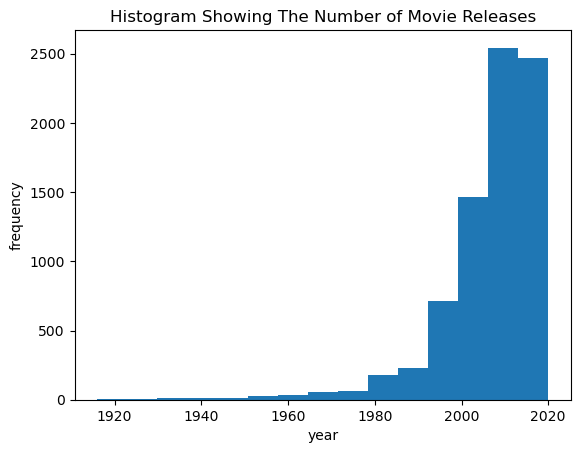

In [120]:
x=Merged_df['year']
plt.hist(x,bins=15)
plt.xlabel('year')
plt.ylabel('frequency')
plt.title('Histogram Showing The Number of Movie Releases')
plt.show();

## Obseravtion
* This histogram clearly shows us the growth in the size of the film industry for over a century.
* There is close to 0 movies created in  1920 and more than 3500 movies released between 2015 and 2020,so the movie business has been thriving and growing.
* It also indicates that there is little risk for the new movie studio since there is a market for movies.

In [122]:
Merged_df['title'].value_counts()

title
Avatar                         1
Hits                           1
Safe Men                       1
The Last Big Thing             1
The Perfect Host               1
                              ..
Crank 2: High Voltage          1
The Man Who Knew Too Little    1
What's Your Number?            1
Disaster Movie                 1
An Actor Prepares              1
Name: count, Length: 7818, dtype: int64

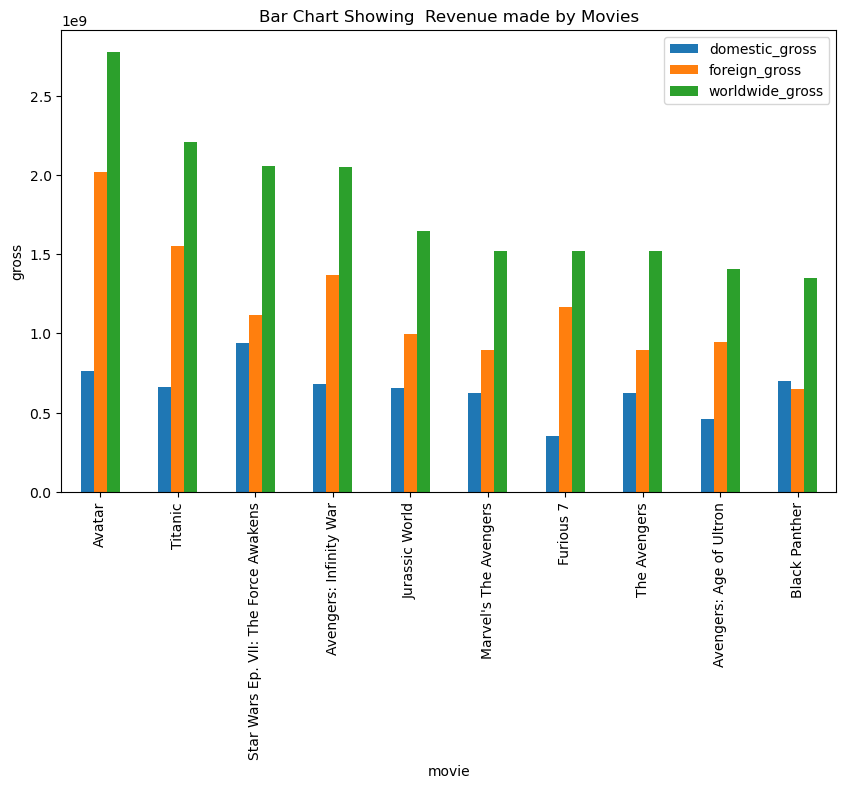

In [123]:
##slicing the title column
Merged_df.groupby(['title'])[['domestic_gross','foreign_gross','worldwide_gross']].sum().sort_values(by='worldwide_gross',ascending=False).head(10).plot(kind = 'bar',figsize = (10,6))
plt.title('Bar Chart Showing  Revenue made by Movies')
plt.xlabel('movie')
plt.ylabel('gross')
plt.show();

These are the top 10 grossing movies

In [125]:
Merged_df.loc[Merged_df['title']== 'Titanic']

,title,production_budget,domestic_gross,worldwide_gross,year,foreign_gross,profit_loss
42,Titanic,200000000.0,659363944.0,2.208208e+09,1997,1.548844e+09,2.008208e+09


## Observation
* The top grossing film is Avatar
* The movie Avatar made a revenue of (2,776,345,000 billion dollars) which is an Action/sci-fi genre type of film.
* The movie made  a profit of 2,351,345,000  billion dollars
* This suggests  we should consider creating Action movies .
* The second grossing film is Titanic which made a revenue  of 2,208,208,000 billion dollars and its a Romance and Adventure film indicating that romance/adventure movies sell.
* Majority of the top 10 grossing movies are Action movies.

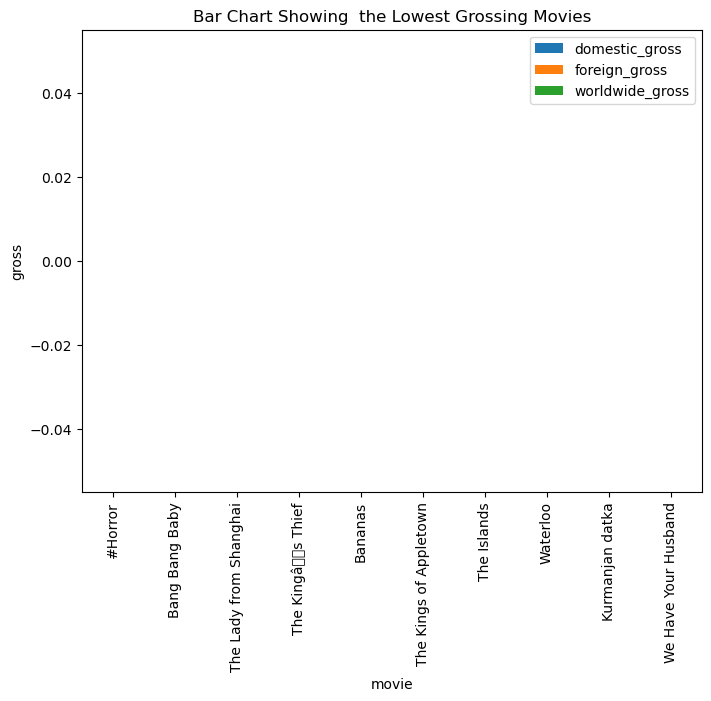

In [127]:
Merged_df.groupby(['title'])[['domestic_gross','foreign_gross','worldwide_gross']].sum().sort_values(by='worldwide_gross',ascending=True).head(10).plot(kind = 'bar',figsize = (8,6))
plt.title('Bar Chart Showing  the Lowest Grossing Movies')
plt.xlabel('movie')
plt.ylabel('gross')
plt.show();

In [128]:
Merged_df.loc[Merged_df['title']== 'Waterloo']

,title,production_budget,domestic_gross,worldwide_gross,year,foreign_gross,profit_loss
2327,Waterloo,25000000.0,0.0,0.0,1970,0.0,-25000000.0


## Observation
* All these 10 movies made a revenue of (0 dollars) domestically and internationally.
* These movies are different  genres so its safe to say that they were just bad movies, so I can't really point out which type of films perfrom badly at the Box office.
* Waterloo is an Action Film.
* Bang Bang Baby is a Sci-fi/Musical Film.
* The Lady from Shanghai is a Thriller Film.
* Bananas is a Comedy Film.

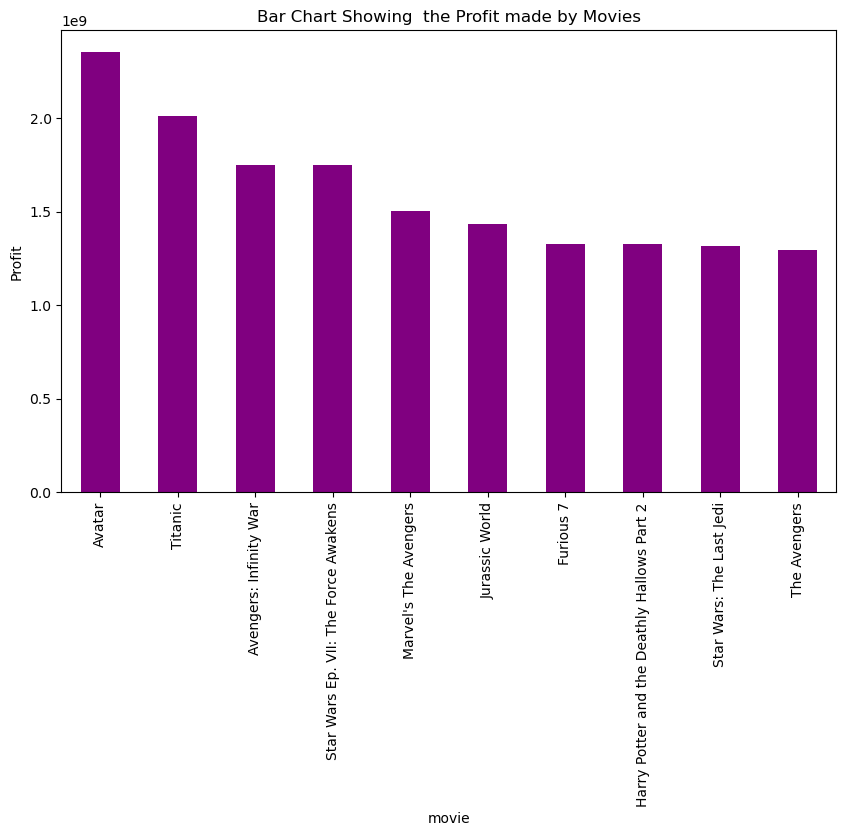

In [130]:
#slicing with profit_loss

Merged_df.groupby(['title'])['profit_loss'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar',color='purple',figsize = (10,6))
plt.title('Bar Chart Showing  the Profit made by Movies')
plt.xlabel('movie')
plt.ylabel('Profit')
plt.show();


The  movie with the most profit is  Avatar


Avatar is both the movie with the largest revenue and has the highest profit margin.

In [133]:
Merged_df.loc[Merged_df['title']== 'Harry Potter and the Deathly Hallows Part 2']

,title,production_budget,domestic_gross,worldwide_gross,year,foreign_gross,profit_loss
6104,Harry Potter and the Deathly Hallows Part 2,17000000.0,381000000.0,1.341500e+09,2011,960500000.0,1.324500e+09


## Observation
* Avatar made a profit of (2,351,345,000 billion dollars) which is an  Action/scifi genre type of film.
* So further supporting that Action movies perform well at the Box office.
* From the graph I can see the highest grossing  films still have the highest profit margin.
* Harry potter and the deathly hallows part 2 made a profit of 1,324,500,000 billion dollars which is a Fantasy and adventure film, so we can consider Fantasy/Adventure films.

I can now show the movies that made losses.

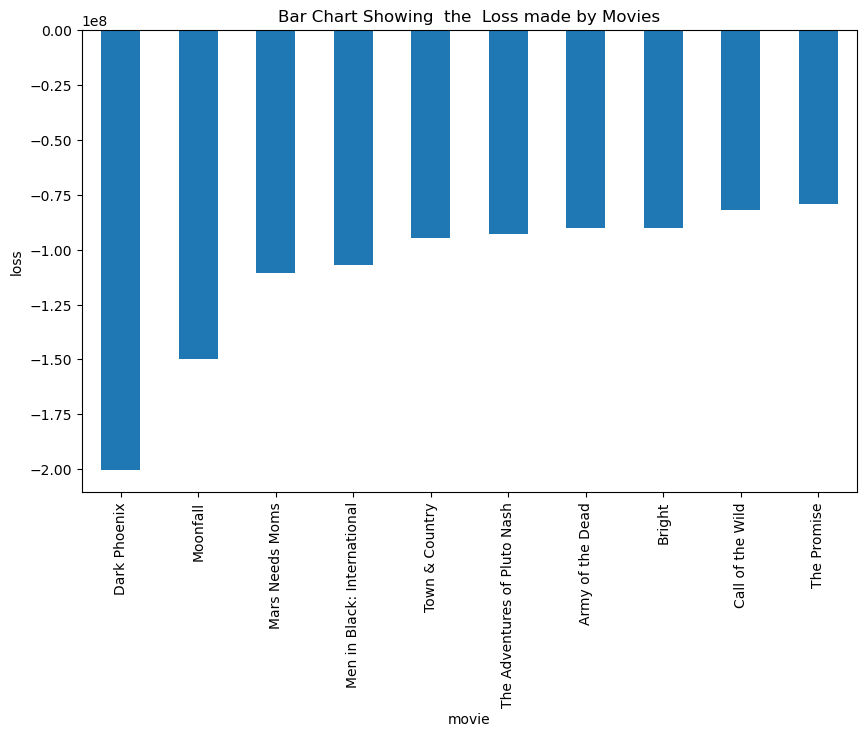

In [136]:
Merged_df.groupby(['title'])['profit_loss'].sum().sort_values(ascending=True).head(10).plot(kind = 'bar',figsize = (10,6))
plt.title('Bar Chart Showing  the  Loss made by Movies')
plt.xlabel('movie')
plt.ylabel('loss')
plt.show();

Above is the top 10 movies that made losses.

In [138]:
Merged_df.loc[Merged_df['title']== 'Mars Needs Moms']

,title,production_budget,domestic_gross,worldwide_gross,year,foreign_gross,profit_loss
193,Mars Needs Moms,150000000.0,21392758.0,39549758.0,2011,18157000.0,-110450242.0


## Observations
* The movie with the most losses is Dark phoenix with a loss of 200,237,650 million dollars  which is an Action/sci-fi film.
* This shows that sometimes studios can get it  wrong, since Action movies are  so popular but you've to create a film that the audience will enjoy to make sure you don't incur losses.
* Majority of the films in the top 10 losses are Action movies so the head of the  new movie studio needs to hire people who know what the audience wants.
* Call of the wind and Mars from moms which are Family/Adventure and Family/Sci-fi respectively also made losses.

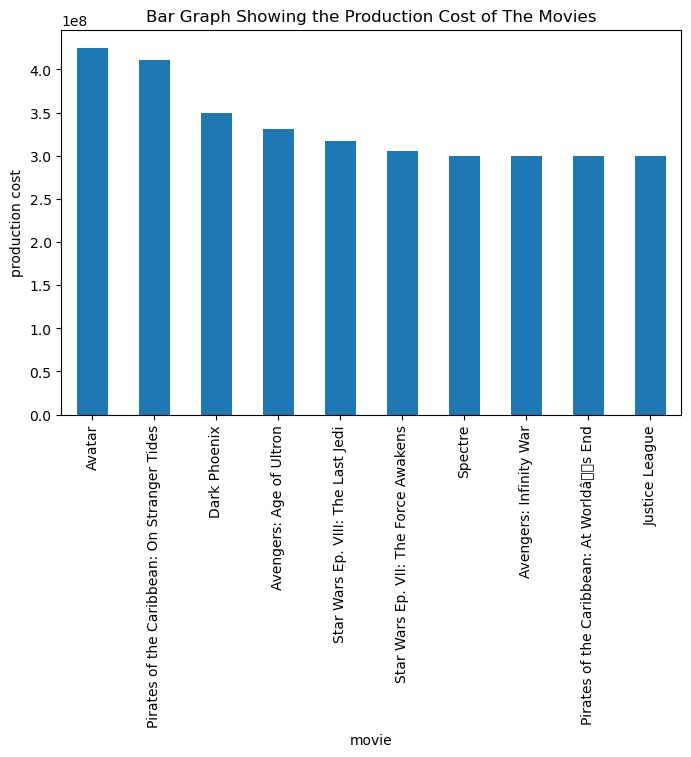

In [140]:
Merged_df.groupby(['title'])['production_budget'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(8,5))
plt.title('Bar Graph Showing the Production Cost of The Movies')
plt.xlabel('movie')
plt.ylabel('production cost')
plt.show();

In [141]:
Merged_df.loc[Merged_df['title']== 'Avengers: Infinity War']

,title,production_budget,domestic_gross,worldwide_gross,year,foreign_gross,profit_loss
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.369319e+09,1.748134e+09


## Observation
* This  shows that making movies is expensive and at times it  requires a lot of capital to make some of the best performing movies.
* This is also evident in the movie Avatar which had a budget of 425,000,000 million dollars but had a  profit of 2,351,345,000 billion dollars
* I can also see that though Pirates of the caribbean requires a lot of money for production it also made profit, so at times the head of new movie studio needs put in a lot of money for success.
* From the graph above only Dark phoenix that had a large budget incurred losses suggesting that the audience didn't like the film.

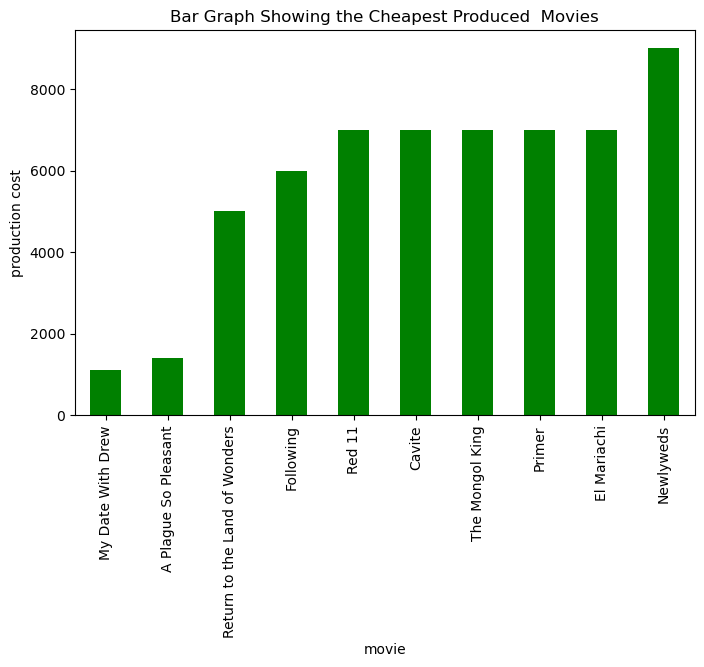

In [143]:
Merged_df.groupby(['title'])['production_budget'].sum().sort_values(ascending=True).head(10).plot(kind='bar',color='green',figsize=(8,5))
plt.title('Bar Graph Showing the Cheapest Produced  Movies')
plt.xlabel('movie')
plt.ylabel('production cost')
plt.show();

In [144]:
Merged_df.loc[Merged_df['title']== 'Primer']

,title,production_budget,domestic_gross,worldwide_gross,year,foreign_gross,profit_loss
5774,Primer,7000.0,424760.0,841926.0,2004,417166.0,834926.0


## Observation
* Majority of the films that had a low budget also managed to get a profit, so at times the head of new movie studio can prioritise being cost effective.
* My Date with drew made a profit of 179,941 thousand dollars.
* El Mariachi made a profit of 2,034,928 million dollars.
* Primer made a profit of 834,926 thousand dollars.
* At times its good to play it safe and not have a huge budget since the new studio is only now joining the film industry and see how the movies created perform.

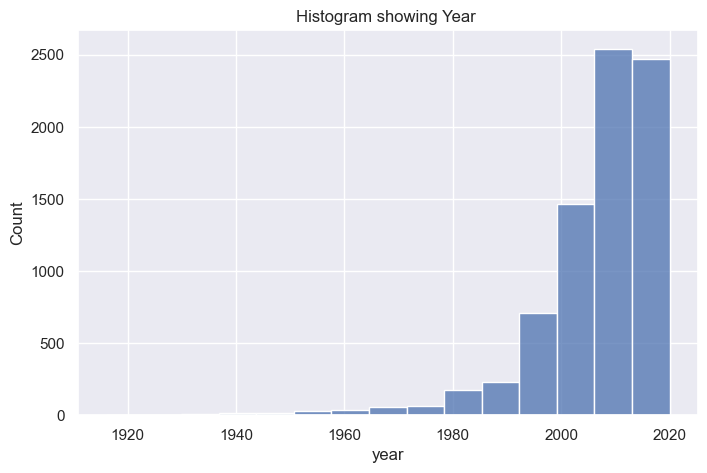

In [146]:
## Plotting using seaborn
sns.set(rc={'figure.figsize':(8,5)})
x=Merged_df['year']
sns.histplot(x,bins=15,label='Histogram')
plt.title('Histogram showing Year ')
plt.show();

## Observation
* Movies have become popular as decades have passed.

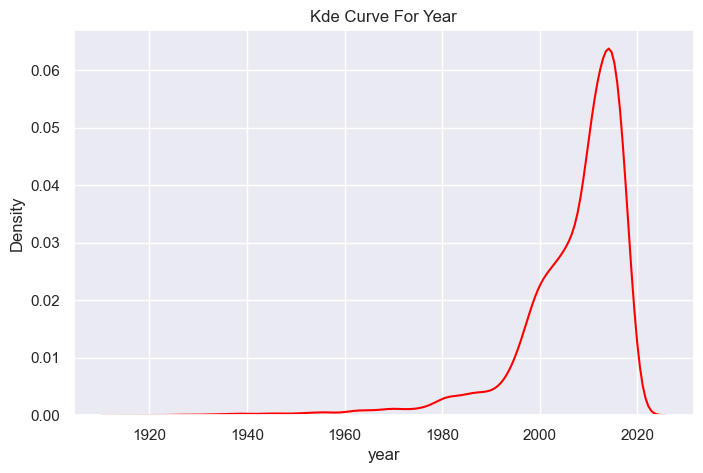

In [148]:
sns.set(rc={"figure.figsize":(8,5)})
x=Merged_df.year
sns.kdeplot(x,color="red")
plt.title("Kde Curve For Year")
plt.show();

I am treating the years as a continuous variable.

## Observation
* Above I am trying to see the trend  of the movie releases and the movie releases are increasing through the years.
* Our graph is an undersmoothed normal curve. 

## Conclusion
* The movies with the most revenue at the Box office are Action/Sci-fi movies so the head of the new movie studio should create Action/Sci-fi films.
* There has been a growth in the movie industry since 1915 and movies are so popular now, so its a good market to invest in.
* Creating movies sometimes requires a lot of capital so the head of the new movie studio should ensure they have the funding as they partake in this new venture.
* The head of the new movie studio should do research on what the audience wants to see to avoid having a box office bomb like the Dark Phoenix movie , meaning they should have good writers and directors at their disposal.

## Recommendations
* Create Action/Sci-fi movies since they generate high revenue and have large profit margins.
* Create Romance/Adventure movies to diversify their  source of income.
* Create fantasy movies.
* Create high-budget films since some of the highest-grossing films had a big budget, as you might have a chance of making even more money by ensuring the quality of the movie is good as they say, high risk, high reward.
* The head of the new movie studio should also be cost effective since some of the movies with low-budgets have gotten a return on their investment at the Box office.
* Create low to mid-budget films because they're a new studio in the film industry and see the reception .

In [153]:
# downloading   modified data 
Merged_df.to_csv("modified_Boxofficedata.csv", index=False)
print(Merged_df.shape)

(7818, 7)
